# **Spaceship Titanic Prediction using Logistic Regression**
### **Predict which passengers are transported to an alternate dimension**

#### **Dataset description**
The dataset was from the Spaceship Titanic Competition from Kaggle.

The competition tasks us to predict whether a passenger was transported to an alternate dimension during the *Spaceship Titanic's* collision with the spacetime anomaly.
<br><br>

#### **Data fields description**
* **PassengerId** - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

* **HomePlanet** - The planet the passenger departed from, typically their planet of permanent residence.

* **CryoSleep** - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

* **Cabin** - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

* **Destination** - The planet the passenger will be debarking to.

* **Age** - The age of the passenger.

* **VIP** - Whether the passenger has paid for special VIP service during the voyage.

* **RoomService, FoodCourt, ShoppingMall, Spa, VRDeck** - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

* **Name** - The first and last names of the passenger.

* **Transported** - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

<br>

#### **Workflow for predicting**

1. Analyze the Dataset
2. Feature Engineering
3. Statistics & Data Visualizations
4. Handling Null Values
5. Data Preprocessing
6. Feature Selection
7. Model Training and Evaluation

In [1]:
import numpy as np
import pandas as pd

# For visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# For preprocessing & feature selection
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.feature_selection import SelectKBest, chi2

# For machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score

In [2]:
train_ = pd.read_csv('../input/spaceship-titanic/train.csv')
test_ = pd.read_csv('../input/spaceship-titanic/test.csv')

### **Analyze the Dataset**

In [3]:
# Show first five rows
train_.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


Display the shape of the data, its columns, and their corresponding dtypes.

In [4]:
train_.shape

(8693, 14)

In [5]:
train_.columns.tolist()

['PassengerId',
 'HomePlanet',
 'CryoSleep',
 'Cabin',
 'Destination',
 'Age',
 'VIP',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck',
 'Name',
 'Transported']

In [6]:
train_.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

**Observations**

* The data has 8,693 entries and 14 columns.
* The columns are 'PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name', and 'Transported'.
* The following are the columns respective dtypes:
 * PassengerId  - object
 * HomePlanet   - object
 * CryoSleep    - object
 * Cabin        - object
 * Destination  - object
 * Age          - float
 * VIP          - object
 * RoomService  - float
 * FoodCourt    - float
 * ShoppingMall - float
 * Spa          - float
 * VRDeck       - float
 * Name         - Name
 * Transported  - bool 

**Decisions**
* Apply preprocessing techniques to categorical features



### **Feature Engineering**

Creating new features

In [7]:
# Create total expenses of each passenger [RoomService + FoodCourt + ShoppingMall + Spa + VRDeck]
train_['TotalExp'] = train_['RoomService'] + train_['FoodCourt'] + train_['ShoppingMall'] + train_['Spa'] + train_['VRDeck']
test_['TotalExp'] = test_['RoomService'] + test_['FoodCourt'] + test_['ShoppingMall'] + test_['Spa'] + test_['VRDeck']
train_.head()
# test_.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,TotalExp
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,736.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,10383.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,5176.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1091.0


In [8]:
# Split Cabin by '/' and store it to the features CabinDeck, CabinNum, and CabinSide
train_[['CabinDeck', 'CabinNum', 'CabinSide']] = train_['Cabin'].str.split('/', expand = True)
test_[['CabinDeck', 'CabinNum', 'CabinSide']] = test_['Cabin'].str.split('/', expand = True)
train_.head()
# test_.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,TotalExp,CabinDeck,CabinNum,CabinSide
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0.0,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,736.0,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,10383.0,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,5176.0,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1091.0,F,1,S


In [9]:
# Split PassengerId by PassengerGrp, and PassengerNum
train_[['PassengerGrp', 'PassengerNum']] = train_['PassengerId'].str.split('_', expand = True).astype(int)
test_[['PassengerGrp', 'PassengerNum']] = test_['PassengerId'].str.split('_', expand = True).astype(int)
train_.head()
# test_.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,TotalExp,CabinDeck,CabinNum,CabinSide,PassengerGrp,PassengerNum
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0.0,B,0,P,1,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,736.0,F,0,S,2,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,10383.0,A,0,S,3,1
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,5176.0,A,0,S,3,2
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1091.0,F,1,S,4,1


Display number of unique values each column

In [10]:
for col in train_.columns:
    print(f'{col} ---------> {train_[col].nunique()}')

PassengerId ---------> 8693
HomePlanet ---------> 3
CryoSleep ---------> 2
Cabin ---------> 6560
Destination ---------> 3
Age ---------> 80
VIP ---------> 2
RoomService ---------> 1273
FoodCourt ---------> 1507
ShoppingMall ---------> 1115
Spa ---------> 1327
VRDeck ---------> 1306
Name ---------> 8473
Transported ---------> 2
TotalExp ---------> 2116
CabinDeck ---------> 8
CabinNum ---------> 1817
CabinSide ---------> 2
PassengerGrp ---------> 6217
PassengerNum ---------> 8


In [11]:
for col in test_.columns:
    print(f'{col} ---------> {test_[col].nunique()}')

PassengerId ---------> 4277
HomePlanet ---------> 3
CryoSleep ---------> 2
Cabin ---------> 3265
Destination ---------> 3
Age ---------> 79
VIP ---------> 2
RoomService ---------> 842
FoodCourt ---------> 902
ShoppingMall ---------> 715
Spa ---------> 833
VRDeck ---------> 796
Name ---------> 4176
TotalExp ---------> 1276
CabinDeck ---------> 8
CabinNum ---------> 1505
CabinSide ---------> 2
PassengerGrp ---------> 3063
PassengerNum ---------> 8


In [12]:
# Extracting numerical features
num_features = train_.select_dtypes(exclude = ['object', 'bool']).columns.tolist()
train_[num_features].head()
# test_[num_features].head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,TotalExp,PassengerGrp,PassengerNum
0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
1,24.0,109.0,9.0,25.0,549.0,44.0,736.0,2,1
2,58.0,43.0,3576.0,0.0,6715.0,49.0,10383.0,3,1
3,33.0,0.0,1283.0,371.0,3329.0,193.0,5176.0,3,2
4,16.0,303.0,70.0,151.0,565.0,2.0,1091.0,4,1


In [13]:
# Extracting categorical features
cat_features = train_.select_dtypes(include = ['object']).columns.tolist()
train_[cat_features].head()
# test_[cat_features].head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name,CabinDeck,CabinNum,CabinSide
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,False,Maham Ofracculy,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,False,Juanna Vines,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,True,Altark Susent,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,False,Solam Susent,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,False,Willy Santantines,F,1,S


### **Statistics & Data Visualizations**

In [14]:
train_.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,TotalExp,PassengerGrp,PassengerNum
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,7785.000000,8693.000000,8693.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791,1484.601541,4633.389624,1.517773
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189,2845.288241,2671.028856,1.054241
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2319.000000,1.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,736.000000,4630.000000,1.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000,1486.000000,6883.000000,2.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,35987.000000,9280.000000,8.000000


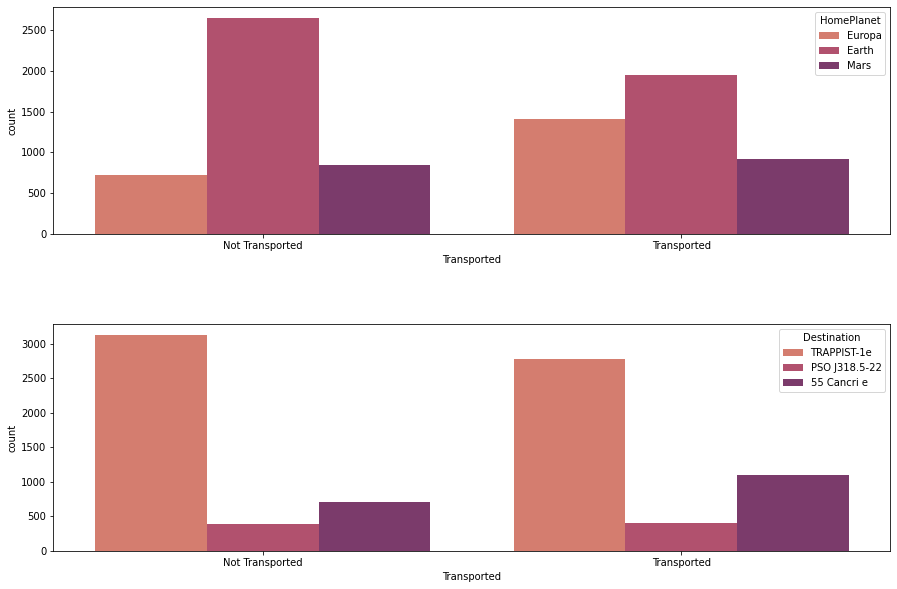

In [15]:
transported_df = train_.copy()

transported_df['Transported'] = transported_df['Transported'].map({True : 'Transported', 
                                                                   False : 'Not Transported'})

feat_cat = ['HomePlanet', 'Destination']

fig, axes = plt.subplots(2, 1, figsize=(15,10))
fig.subplots_adjust(hspace=0.4)
i = 0
for triaxis in axes:
    sns.countplot(data = transported_df, x = 'Transported',
                hue = transported_df[feat_cat[i]], 
                palette = 'flare', ax = triaxis)
  
    i = i + 1

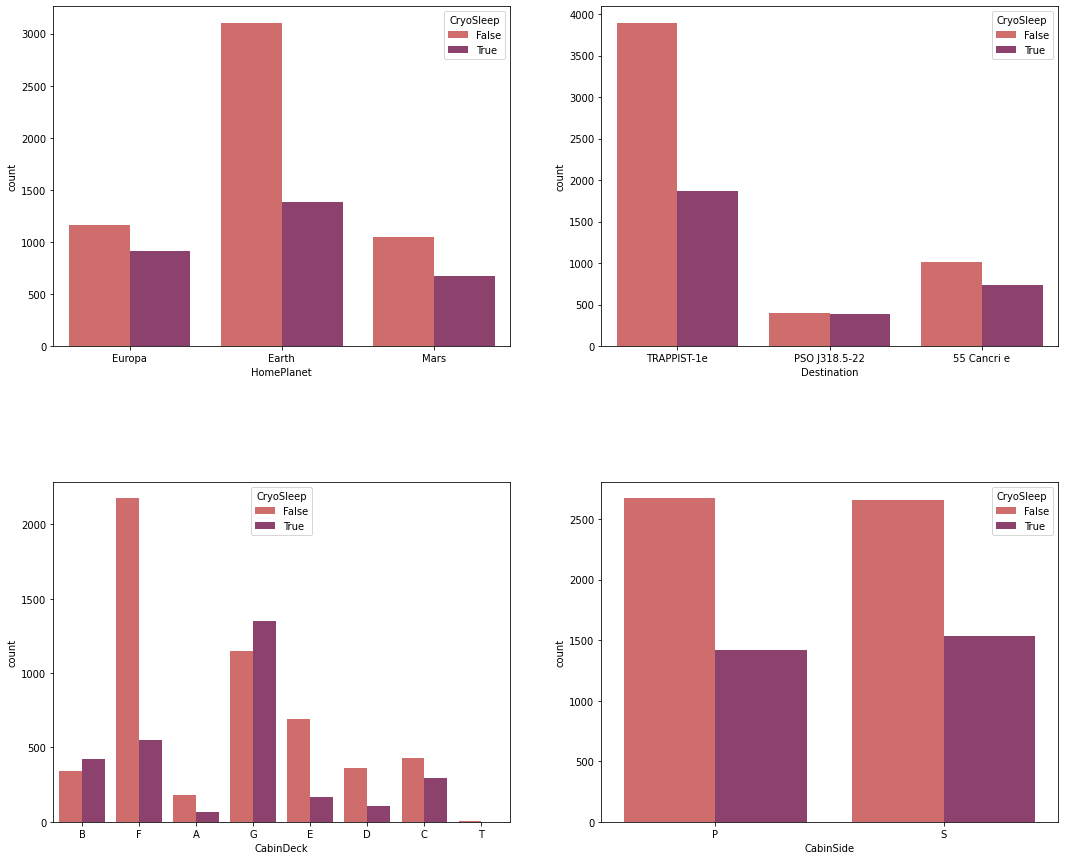

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(18,15))
fig.subplots_adjust(hspace=0.4)
feat_cat = ['HomePlanet', 'Destination', 'CabinDeck', 'CabinSide']
i = 0
for triaxis in axes:
    for axis in triaxis:
        sns.countplot(data = transported_df, x = train_[feat_cat[i]],
                      hue = 'CryoSleep', 
                      palette = 'flare', ax = axis)
        i = i + 1

**Distribution of Numerical Features**

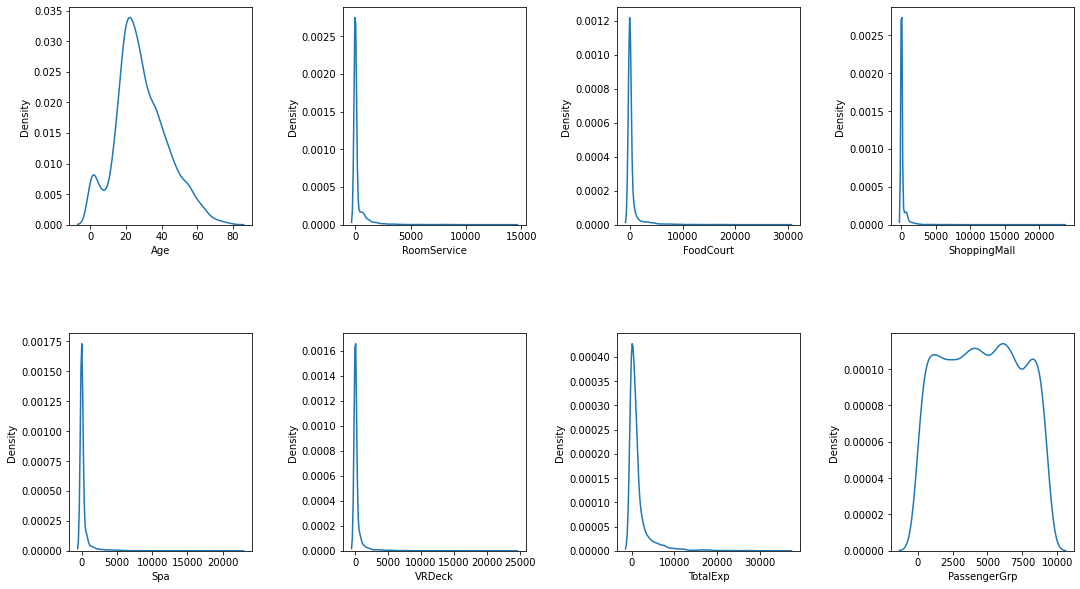

In [17]:
fig, axes = plt.subplots(len(train_[num_features].columns)//4, 4, figsize = (18, 10))
i = 0
fig.subplots_adjust(hspace=0.5,
                    wspace = 0.5)
for triaxis in axes:
    for axis in triaxis:
        sns.kdeplot(data = train_[num_features[i]], ax = axis)
        i = i+1
        # fig.delaxes(axes[1,3])


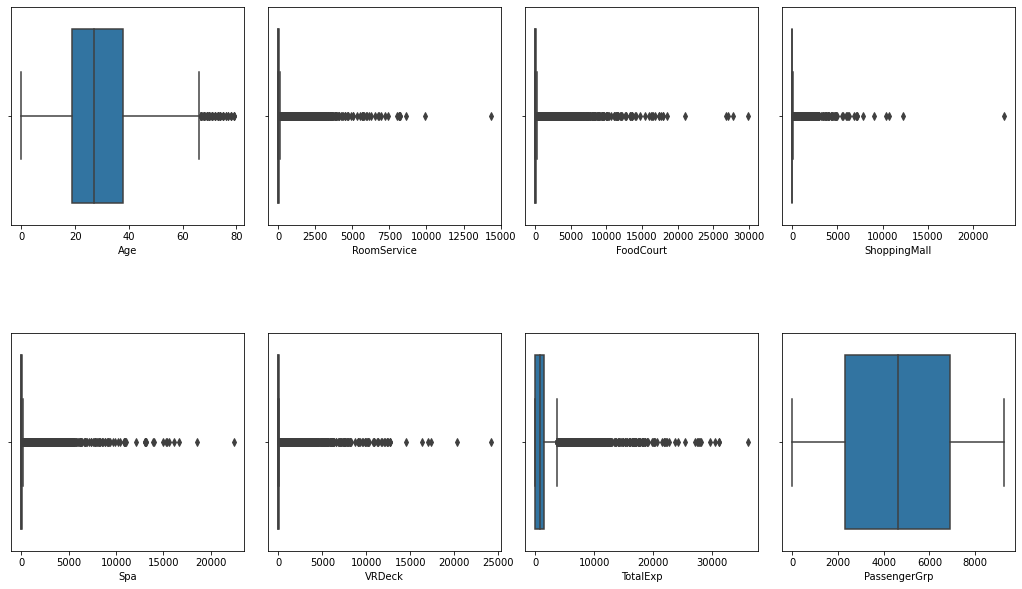

In [18]:
fig, axes = plt.subplots(len(train_[num_features].columns)//4, 4, figsize = (18, 10))
i = 0
fig.subplots_adjust(hspace=0.5,
                    wspace = 0.1)
for triaxis in axes:
    for axis in triaxis:
        sns.boxplot(x = train_[num_features[i]], ax = axis)
        i = i+1

Correlation between Categorical and Numerical features

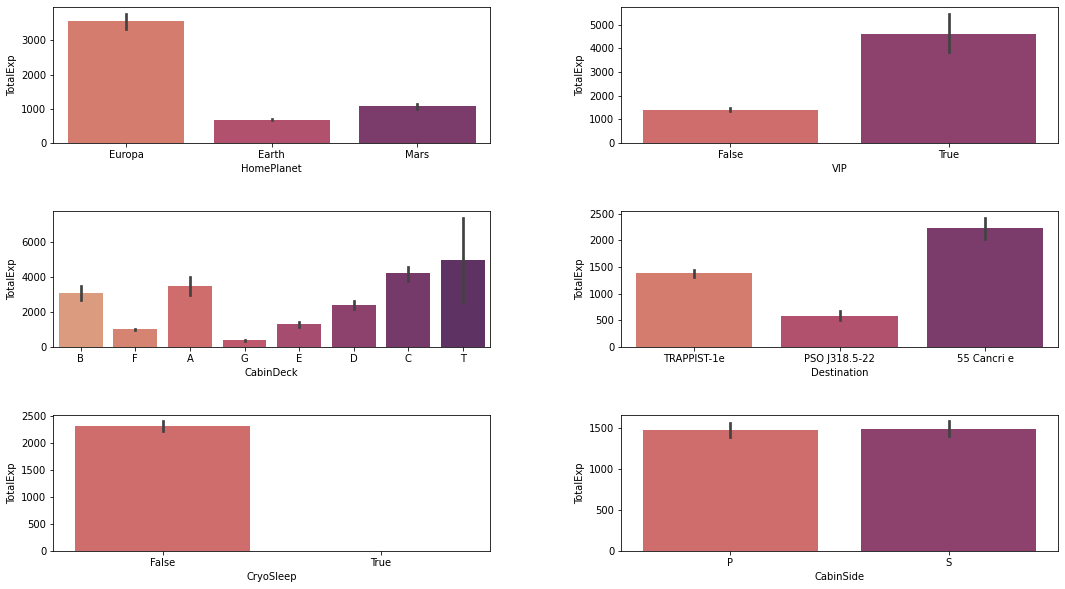

In [19]:
categorical = ['HomePlanet', 'VIP', 'CabinDeck', 
               'Destination', 'CryoSleep', 'CabinSide']

fig, axes = plt.subplots(len(train_[num_features].columns)//3, 2, figsize = (18, 10))
i = 0
fig.subplots_adjust(hspace=0.5,
                    wspace = 0.3)
for triaxis in axes:
    for axis in triaxis:
        sns.barplot(data = train_, x = train_[categorical[i]],
                    y = 'TotalExp', ax = axis, palette = 'flare')
        i = i+1

**Observations**
* Most of the people in the dataset are from planet Earth.
* The designated destination of most people is in planet TRAPPIST-1e.
* Most of the people in the dataset are in the age range of 20-30 years old.
* Outliers are present in almost all of the numerical features.

**Decisisions**
* Create new features using Feature engineering.
* Consider on including the features 'HomePlanet', 'Destination, 'CabinDeck', 'VIP', 'CryoSleep', and 'CabinSide.'

### **Handling Null Values**

Determine the number of null values for each column.

In [20]:
train_.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
TotalExp        float64
CabinDeck        object
CabinNum         object
CabinSide        object
PassengerGrp      int64
PassengerNum      int64
dtype: object

In [21]:
train_.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
TotalExp        908
CabinDeck       199
CabinNum        199
CabinSide       199
PassengerGrp      0
PassengerNum      0
dtype: int64

In [22]:
test_.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
TotalExp        455
CabinDeck       100
CabinNum        100
CabinSide       100
PassengerGrp      0
PassengerNum      0
dtype: int64

**Observations**
* Most of the columns have missing data.
* Only the columns 'PassengerId', 'Transported', 'PassengerGrp', and 'PassengerNum' do not have null values.

**Decisions**
* Impute the missing values with median.

In [23]:
train_[num_features].isnull().sum()

Age             179
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
TotalExp        908
PassengerGrp      0
PassengerNum      0
dtype: int64

In [24]:
# Impute missing values with Median for each Numerical feature
for col in num_features:
    train_[col] = train_[col].fillna(train_[col].median())

train_[num_features].isnull().sum()

Age             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
TotalExp        0
PassengerGrp    0
PassengerNum    0
dtype: int64

In [25]:
test_[num_features].isnull().sum()

Age              91
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
TotalExp        455
PassengerGrp      0
PassengerNum      0
dtype: int64

In [26]:
# Impute missing values with Median for each Numerical feature
for col in num_features:
    test_[col] = test_[col].fillna(test_[col].median())

test_[num_features].isnull().sum()

Age             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
TotalExp        0
PassengerGrp    0
PassengerNum    0
dtype: int64

In [27]:
train_[cat_features].isnull().sum()

PassengerId      0
HomePlanet     201
CryoSleep      217
Cabin          199
Destination    182
VIP            203
Name           200
CabinDeck      199
CabinNum       199
CabinSide      199
dtype: int64

In [28]:
# Impute missing values with Mode for each Categorical feature
for col in cat_features:
    train_[col] = train_[col].fillna(train_[col].mode()[0])

train_['CabinNum'] = train_['CabinNum'].astype(int)
train_[cat_features].isnull().sum()

PassengerId    0
HomePlanet     0
CryoSleep      0
Cabin          0
Destination    0
VIP            0
Name           0
CabinDeck      0
CabinNum       0
CabinSide      0
dtype: int64

In [29]:
test_[cat_features].isnull().sum()

PassengerId      0
HomePlanet      87
CryoSleep       93
Cabin          100
Destination     92
VIP             93
Name            94
CabinDeck      100
CabinNum       100
CabinSide      100
dtype: int64

In [30]:
# Impute missing values with Mode for each Categorical feature
for col in cat_features:
    test_[col] = test_[col].fillna(test_[col].mode()[0])

test_['CabinNum'] = test_['CabinNum'].astype(int)
test_[cat_features].isnull().sum()

PassengerId    0
HomePlanet     0
CryoSleep      0
Cabin          0
Destination    0
VIP            0
Name           0
CabinDeck      0
CabinNum       0
CabinSide      0
dtype: int64

In [31]:
train_.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
TotalExp        0
CabinDeck       0
CabinNum        0
CabinSide       0
PassengerGrp    0
PassengerNum    0
dtype: int64

In [32]:
test_.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
TotalExp        0
CabinDeck       0
CabinNum        0
CabinSide       0
PassengerGrp    0
PassengerNum    0
dtype: int64

### **Data Preprocessing**

In [33]:
# Drop unncecessary columns
drop_col = ['Cabin', 'Name']
train_ = train_.drop(columns = drop_col)
test_ = test_.drop(columns = drop_col)

In [34]:
train_.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,TotalExp,CabinDeck,CabinNum,CabinSide,PassengerGrp,PassengerNum
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0.0,B,0,P,1,1
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,736.0,F,0,S,2,1
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,10383.0,A,0,S,3,1
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,5176.0,A,0,S,3,2
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,1091.0,F,1,S,4,1


In [35]:
test_.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,TotalExp,CabinDeck,CabinNum,CabinSide,PassengerGrp,PassengerNum
0,0013_01,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,0.0,G,3,S,13,1
1,0018_01,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,2832.0,F,4,S,18,1
2,0019_01,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,0.0,C,0,S,19,1
3,0021_01,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,7418.0,C,1,S,21,1
4,0023_01,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,645.0,F,5,S,23,1


In [36]:
X = train_.drop(columns = ['Transported'])
y = train_[['PassengerId', 'Transported']]

In [37]:
X.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,TotalExp,CabinDeck,CabinNum,CabinSide,PassengerGrp,PassengerNum
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,0.0,B,0,P,1,1
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,736.0,F,0,S,2,1
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,10383.0,A,0,S,3,1
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,5176.0,A,0,S,3,2
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,1091.0,F,1,S,4,1


In [38]:
y.head()

,PassengerId,Transported
0,0001_01,False
1,0002_01,True
2,0003_01,False
3,0003_02,False
4,0004_01,True


Apply label encoder to categorical features

In [39]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures

le = LabelEncoder()
categories = ['HomePlanet', 'CryoSleep', 'Destination',
              'VIP', 'CabinDeck', 'CabinSide']
encoded_ = []
test_enc = []

for col in categories:
    X_encoded = le.fit_transform(X[col])
    test_encoded = le.fit_transform(test_[col])
    encoded_.append(X_encoded)
    test_enc.append(test_encoded)

df_encoded = pd.DataFrame({'HomePlanet_': encoded_[0],
                           'Is_CryoSleep': encoded_[1],
                           'Destination_': encoded_[2],
                           'Is_VIP': encoded_[3],
                           'CabinDeck_': encoded_[4],
                           'CabinSide_': encoded_[5]})

df_test_encoded = pd.DataFrame({'HomePlanet_': test_enc[0],
                           'Is_CryoSleep': test_enc[1],
                           'Destination_': test_enc[2],
                           'Is_VIP': test_enc[3],
                           'CabinDeck_': test_enc[4],
                           'CabinSide_': test_enc[5]})

X = pd.concat([X, df_encoded], axis = 1)
X.drop(columns = categories, inplace = True)
test_ = pd.concat([test_, df_test_encoded], axis = 1)
test_.drop(columns = categories, inplace = True)
X.head()
# test_.head()

,PassengerId,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,TotalExp,CabinNum,PassengerGrp,PassengerNum,HomePlanet_,Is_CryoSleep,Destination_,Is_VIP,CabinDeck_,CabinSide_
0,0001_01,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,1,0,2,0,1,0
1,0002_01,24.0,109.0,9.0,25.0,549.0,44.0,736.0,0,2,1,0,0,2,0,5,1
2,0003_01,58.0,43.0,3576.0,0.0,6715.0,49.0,10383.0,0,3,1,1,0,2,1,0,1
3,0003_02,33.0,0.0,1283.0,371.0,3329.0,193.0,5176.0,0,3,2,1,0,2,0,0,1
4,0004_01,16.0,303.0,70.0,151.0,565.0,2.0,1091.0,1,4,1,0,0,2,0,5,1


In [40]:
y_encoded = le.fit_transform(y['Transported'])
df_encoded = pd.DataFrame({'Transported_enc': y_encoded})
y = pd.concat([y, df_encoded], axis = 1)
y = y.drop(columns = ['Transported'])
y.head()

,PassengerId,Transported_enc
0,0001_01,0
1,0002_01,1
2,0003_01,0
3,0003_02,0
4,0004_01,1


In [41]:
# Setting PassengerId as the index
index_ = ['PassengerId']
X = X.set_index(index_)
y = y.set_index(index_)

In [42]:
X.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,TotalExp,CabinNum,PassengerGrp,PassengerNum,HomePlanet_,Is_CryoSleep,Destination_,Is_VIP,CabinDeck_,CabinSide_
PassengerId,,,,,,,,,,,,,,,,
0001_01,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,1,0,2,0,1,0
0002_01,24.0,109.0,9.0,25.0,549.0,44.0,736.0,0,2,1,0,0,2,0,5,1
0003_01,58.0,43.0,3576.0,0.0,6715.0,49.0,10383.0,0,3,1,1,0,2,1,0,1
0003_02,33.0,0.0,1283.0,371.0,3329.0,193.0,5176.0,0,3,2,1,0,2,0,0,1
0004_01,16.0,303.0,70.0,151.0,565.0,2.0,1091.0,1,4,1,0,0,2,0,5,1


In [43]:
y.head()

,Transported_enc
PassengerId,
0001_01,0
0002_01,1
0003_01,0
0003_02,0
0004_01,1


In [44]:
test_.head()

,PassengerId,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,TotalExp,CabinNum,PassengerGrp,PassengerNum,HomePlanet_,Is_CryoSleep,Destination_,Is_VIP,CabinDeck_,CabinSide_
0,0013_01,27.0,0.0,0.0,0.0,0.0,0.0,0.0,3,13,1,0,1,2,0,6,1
1,0018_01,19.0,0.0,9.0,0.0,2823.0,0.0,2832.0,4,18,1,0,0,2,0,5,1
2,0019_01,31.0,0.0,0.0,0.0,0.0,0.0,0.0,0,19,1,1,1,0,0,2,1
3,0021_01,38.0,0.0,6652.0,0.0,181.0,585.0,7418.0,1,21,1,1,0,2,0,2,1
4,0023_01,20.0,10.0,0.0,635.0,0.0,0.0,645.0,5,23,1,0,0,2,0,5,1


In [45]:
test = test_.copy()
test = test.drop(columns = ['PassengerId'])

scaler = StandardScaler(with_mean = False, with_std = True)
scaled_ = scaler.fit_transform(X)
scaled_test = scaler.fit_transform(test)
scaled_ = pd.DataFrame(scaled_, columns = X.columns)
scaled_test = pd.DataFrame(scaled_test, columns = test.columns)
# scaled_.head()

In [46]:
poly_ = PolynomialFeatures(include_bias = False)
scaled_ = poly_.fit_transform(scaled_)
scaled_ = pd.DataFrame(scaled_)
scaled_.shape

(8693, 152)

In [47]:
poly_ = PolynomialFeatures(include_bias = False)
scaled_test = poly_.fit_transform(scaled_test)
scaled_test = pd.DataFrame(scaled_test)
scaled_test.shape

(4277, 152)

### **Model Training and Evaluation**

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(scaled_, y, test_size = 0.33,
                                                    random_state = 101)

In [49]:
log_reg = LogisticRegression(solver = 'liblinear')
log_reg.fit(X_train, np.ravel(y_train))

LogisticRegression(solver='liblinear')

In [50]:
predicted = log_reg.predict(X_test)

**Classification Report**

In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79      1429
           1       0.79      0.81      0.80      1440

    accuracy                           0.80      2869
   macro avg       0.80      0.80      0.80      2869
weighted avg       0.80      0.80      0.80      2869



**Model Score**

In [52]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
print(f"The model's accuracy score is {round(accuracy_score(y_test, predicted)*100, 2)}%")

The model's accuracy score is 79.75%


**Confusion Matrix**

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

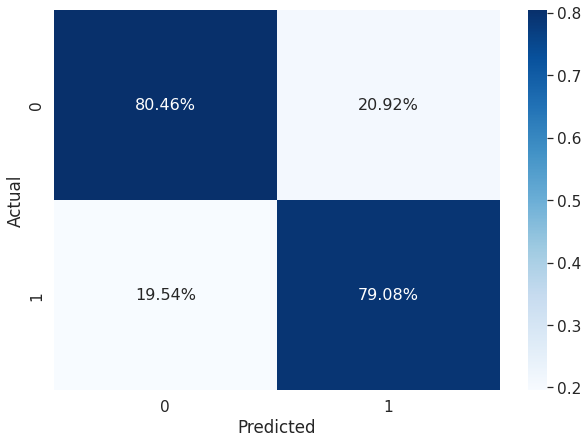

In [53]:
data = confusion_matrix(y_test, predicted)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(predicted))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm/np.sum(df_cm), cmap="Blues", annot=True,annot_kws={"size": 16}, fmt = '.2%')

**Observations**
* The model has a precision score of 81% in predicting whether a person is transported.
* The model also has a recall score of 81%, which means how prevalent the model was predicting whether a person is transported.
* Since the precision and recall has the same score, the F1 score also has the score of 81%, which is the weighted average of recall and precision.
* The overall accuracy of the model is 80.52%.  

**Plotting ROC curve and AUC** 

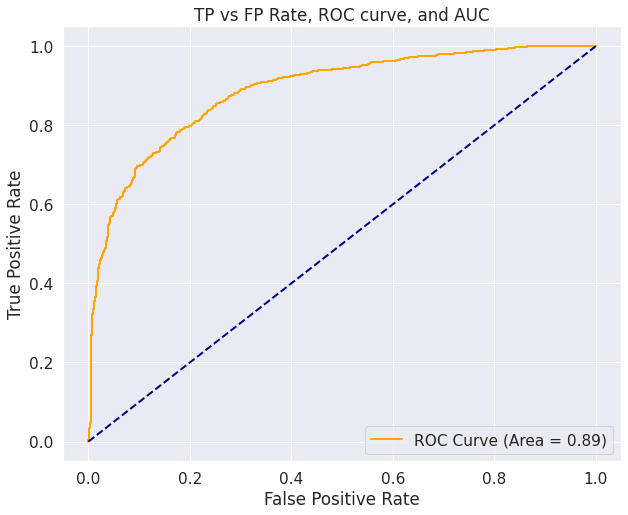

In [54]:
from sklearn.metrics import roc_curve
pred_prob_ =  log_reg.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, pred_prob_)
auc = roc_auc_score(y_test, pred_prob_)

plt.figure(figsize = (10,8))
plt.plot(fpr, tpr, color = 'orange', lw = 2,
         label = 'ROC Curve (Area = %0.2f)' % auc)
plt.plot([0,1], [0, 1], color = 'navy', linestyle = '--', lw = 2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('TP vs FP Rate, ROC curve, and AUC')
plt.legend(loc = 'lower right')

plt.show()

### **Importing to submission.csv**

In [55]:
submission = pd.DataFrame({
    'PassengerId' : test_['PassengerId'],
    'Transported' : log_reg.predict(scaled_test).astype(bool)
})

submission.to_csv('./submission.csv', index = False)

In [56]:
submission

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,True
4274,9271_01,True
4275,9273_01,True
